In [2]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from beakerx import *
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
from ipywidgets import interact,Dropdown,IntSlider,FloatRangeSlider, FloatSlider, RadioButtons
rc('animation', html='html5')
import mahotas

In [9]:
cd ~/projects/membrane/

/home/xupeng/projects/membrane


In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
f = np.ones((256,256), bool)
f[200:,240:] = False
f[128:144,32:48] = False

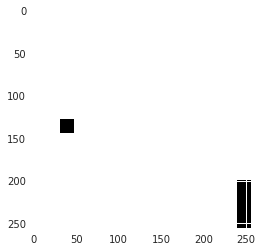

In [6]:
gray()
imshow(f)
show()

In [7]:
dmap = mahotas.distance(f)

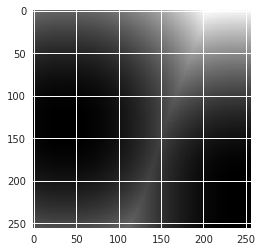

In [8]:
f = np.ones((256,256), bool)
f[200:,240:] = False
f[128:144,32:48] = False
# f is basically True with the exception of two islands: one in the lower-right
# corner, another, middle-left

dmap = mahotas.distance(f)
imshow(dmap)

The distance transform is often combined with the watershed for segmentation. 

In [11]:
try:
    nuclear_path = path.join(
                    path.dirname(path.abspath(__file__)),
                    'data',
                    'nuclear.png')
except NameError:
    nuclear_path = path.join('data', 'nuclear.png')

In [12]:
nuclear_path

'data/nuclear.png'

In [13]:
import mahotas
from os import path

In [14]:
nuclear = mahotas.imread('data/nuclear.png')
nuclear = nuclear[:,:,0]
nuclear = mahotas.gaussian_filter(nuclear, 1.)
threshed  = (nuclear > nuclear.mean())
distances = mahotas.stretch(mahotas.distance(threshed))
Bc = np.ones((9,9))

maxima = mahotas.morph.regmax(distances, Bc=Bc)
spots,n_spots = mahotas.label(maxima, Bc=Bc)
surface = (distances.max() - distances)
areas = mahotas.cwatershed(surface, spots)
areas *= threshed

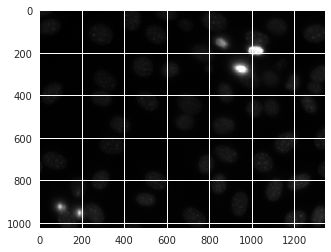

In [16]:
imshow(nuclear)

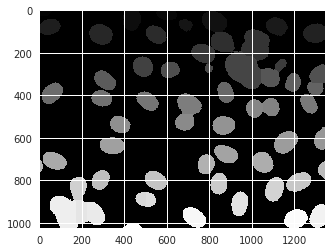

In [15]:
imshow(areas)

In [10]:


import random
from matplotlib import colors as c
colors = map(plt.cm.jet,range(0, 256, 4))
random.shuffle(colors)
colors[0] = (0.,0.,0.,1.)
rmap = c.ListedColormap(colors)
plt.imshow(areas, cmap=rmap)
plt.show()

TypeError: object of type 'map' has no len()

In [81]:
# xx and yy are 200x200 tables containing the x and y coordinates as values
# mgrid is a mesh creation helper
xx, yy = numpy.mgrid[:200, :200]
# circles contains the squared distance to the (100, 100) point
# we are just using the circle equation learnt at school
circle = (xx - 100) ** 2 + (yy - 100) ** 2
# donuts contains 1's and 0's organized in a donut shape
# you apply 2 thresholds on circle to define the shape
donut = numpy.logical_and(circle < (6400 + 60), circle > (6400 - 60))

In [82]:
donut[donut==True] = 1
donut[donut==False] = 0

In [83]:
import cv2
donut1 = cv2.dilate( np.uint8(donut), None, iterations = 4)

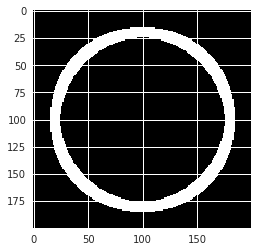

In [84]:
imshow(donut1,cmap ='gray')

In [49]:
def cvFillHoles(img):
    """
    # assume input is uint8 B & W(0 or 1)
    # this function imitates imfill(image, 'hole')
    """
    holes = img.copy()
    cv2.floodFill(holes,None, (0,0), 1) # 找到洞孔
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if holes[i,j]==0:
                img[i,j]=255

    return img

filledEdgesOut=cvFillHoles(donut1)

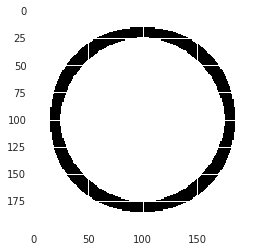

In [50]:
imshow(filledEdgesOut)

In [ ]:
import mahotas as mh
minima = mh.regmin(donut1)
markers,nr_markers = mh.label(minima)

In [44]:
minima = np.zeros(minima.shape).astype('int')
minima[90:110,90:110] =1

In [51]:
W = mh.cwatershed(donut1, donut1)

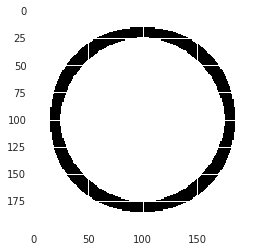

In [52]:
imshow(W,cmap ='gray')

In [55]:
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

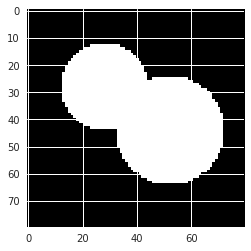

In [56]:
imshow(image)

In [67]:
from scipy import ndimage as ndi
from skimage.morphology import watershed
distance = ndi.distance_transform_edt(image)
from skimage.feature import peak_local_max
local_maxi = peak_local_max(distance, labels=image,
                          footprint=np.ones((2, 2)),
                            indices=False)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

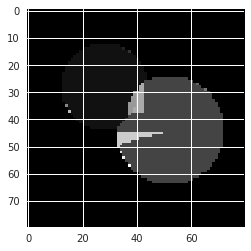

In [68]:
imshow(labels)

In [65]:
from scipy import ndimage as ndi
from skimage.morphology import watershed
distance = ndi.distance_transform_edt(donut1)
from skimage.feature import peak_local_max
local_maxi = peak_local_max(distance, labels=donut1,
                          footprint=np.ones((2, 2)),
                            indices=False)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=donut1)

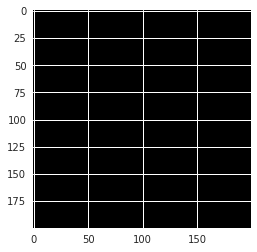

In [66]:
imshow(labels)

In [76]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(donut1)

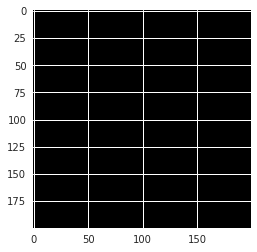

In [77]:
imshow(fill_coins)

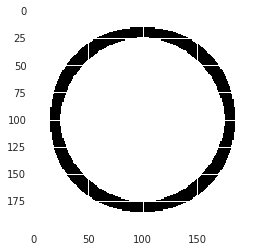

In [75]:
imshow(donut1)

In [79]:
np.unique(fill_coins,return_counts=True)

(array([ True]), array([40000]))

In [74]:
donut1[donut1==2]=255
donut1[donut1==1]=0

In [ ]:
with h5py.File('data/mask1/mask1_em.h5') as f

In [87]:
donut1[donut1==1]=0
donut1[donut1==2]=1
donut1 = donut1.astype('int')

In [ ]:
markers = cv2.watershed(donut1,donut1)